In [1]:
import cv2 
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
subjects = ["","John","Elvis","Ashley","Gabrielle"]

In [3]:
def detect_face(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier('/Users/nancyscarlet/opt/anaconda3/lib/python3.7/site-packages/cv2/data/lbpcascade_frontalface.xml')
    
    faces = face_cascade.detectMultiScale(gray,scaleFactor=1.2,minNeighbors=5)
    #print('Len faces',len(faces))
    if(len(faces) == 0):
        return None, None
    
    #(x,y,w,h) = faces[0]
    result = []
    for face in faces:
        (x,y,w,h)= face
        result.append((gray[y:y+w, x:x+h], face))
        
    return result #gray[y:y+w, x:x+h], faces[0]
    

In [4]:
def prepare_training_data(data_folder_path):
    dirs = os.listdir(data_folder_path)
    faces = []
    labels = []
    for dir_name in dirs:
        if not dir_name.startswith("s"):
            continue
        
        label = int(dir_name.replace("s",""))
        
        subject_dir_path = data_folder_path+"/"+dir_name
        subject_images_names = os.listdir(subject_dir_path)
        
        for image_name in subject_images_names:
            if image_name.startswith("."):
                continue
                
            image_path = subject_dir_path+"/"+image_name
            image = cv2.imread(image_path)
            
            cv2.imshow("Training on image...", image)
            cv2.waitKey(100)
            resultList = detect_face(image)
            face = None 
            rect = None
            if len(resultList)==1:
                face, rect = resultList[0]
            else:
                print('Multiple faces')
            
            if face is not None:
                faces.append(face)
                labels.append(label)
                
    return faces, labels

In [5]:
faces, labels = prepare_training_data("training-data")
#print("Data prepared")

#print("Total faces: ", len(faces))
#print("Total labels: ",len(labels))

Multiple faces
Multiple faces
Multiple faces
Multiple faces
Multiple faces


In [6]:
face_recognizer  = cv2.face.LBPHFaceRecognizer_create()

#cv2.face.LBPHFisherFaceRecognizer()
#recognizer = **cv2.face.LBPHFaceRecognizer_create()**


In [7]:
#pip install opencv-contrib-python

In [8]:
face_recognizer.train(faces, np.array(labels))

### PREDICTION

In [9]:
def draw_rectangle(img, rect):
    (x,y,w,h) = rect
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

def draw_text(img, text, x, y):
    cv2.putText(img, text, (x, y), cv2.FONT_HERSHEY_PLAIN, 1.5, (0,255,0), 2)

In [10]:
def predict(test_img):
    img = test_img.copy()
    result1 = []
    #face, rect = detect_face(img)
    resultList = detect_face(img)
    
    if len(resultList) == 0:
        face, rect = resultList[0]
        label = face_recognizer.predict(face)
        
        #print("Label",label[0],"\n")
        label_text = subjects[label[0]]
        #print('LabelTxt:',label_text)
        draw_rectangle(img, rect)
        draw_text(img, label_text, rect[0], rect[1]-5)
        result1= img,label[0]
    else:
            for face, rect in resultList:
                label = face_recognizer.predict(face)
                label_text = subjects[label[0]]
                draw_rectangle(img, rect)
                draw_text(img, label_text, rect[0], rect[1]-5)
                a=(img, label[0])
            
                print(type(a))
                result1.append(a)
    #print("Label: ",result1[0][0])
    return result1 #img,label[0]

<class 'tuple'>
1
<class 'tuple'>
<class 'tuple'>


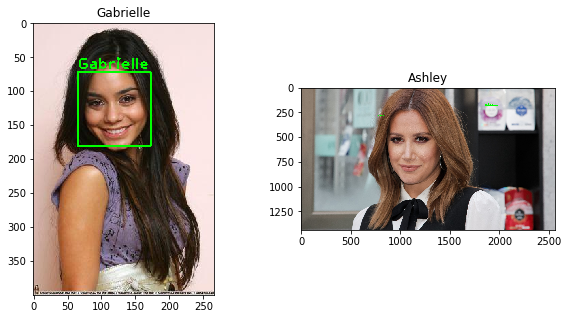

In [11]:
test1 = cv2.imread('test-data/test6.jpg')
test2 = cv2.imread('test-data/test3.jpg')
f, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))

r1=predict(test1)
print(len(r1))
if(len(r1)==1):
    predict1,label1 = r1[0]
    ax1.set_title(subjects[label1])
    ax1.imshow(cv2.cvtColor(predict1, cv2.COLOR_BGR2RGB))
r2 = predict(test2)
predict2=None
label2=None
if(len(r2)==1):
    predict2,label2 = r2[0]
else:
    predict2,label2 = r2[0]
    ax2.set_title(subjects[label2])
    ax2.imshow(cv2.cvtColor(predict2, cv2.COLOR_BGR2RGB))

<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
3
2
4


Text(0.5, 1.0, ',Ashley,Elvis,Gabrielle')

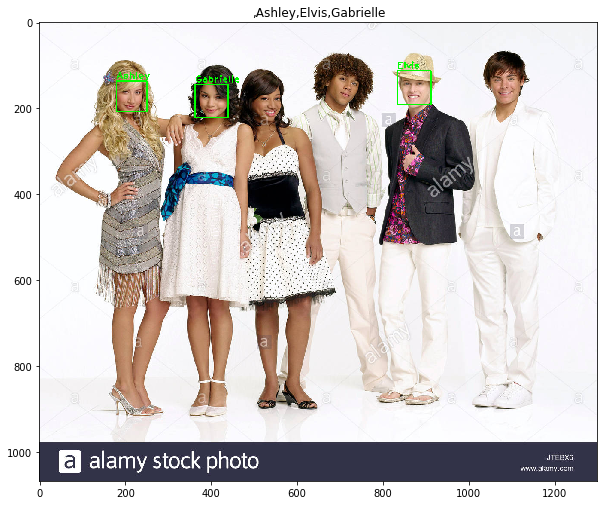

In [12]:
test3 = cv2.imread('test-data/test4.jpg')
f, ax = plt.subplots(1,1, figsize=(10,10))
labelFinal = ""
r3 = predict(test3)
if(len(r3)==1):
    predict3,label3 = r3[0]
    labelFinal = subjects[label3]
    ax.imshow(cv2.cvtColor(predict3, cv2.COLOR_BGR2RGB))
else:
    predi = r3[0][0]
    for pred,label in r3:
        print(label)
        labelFinal= labelFinal+","+subjects[label]
    ax.imshow(cv2.cvtColor(predi, cv2.COLOR_BGR2RGB))

ax.set_title(labelFinal)  

#ax2.set_title(subjects[label2])
#ax2.imshow(cv2.cvtColor(predict2, cv2.COLOR_BGR2RGB))

In [27]:
vc = cv2.VideoCapture('testvid2.mp4')
face_locations = []
haar_face_cascade =  cv2.CascadeClassifier('/Users/nancyscarlet/opt/anaconda3/lib/python3.7/site-packages/cv2/data/haarcascade_frontalface_default.xml')
def detect_faces(f_cascade, img, scaleFactor):
    img_copy = img.copy()
    gray_img = cv2.cvtColor(img_copy,cv2.COLOR_BGR2GRAY)
    faces = f_cascade.detectMultiScale(gray_img, scaleFactor=scaleFactor,minNeighbors=5)
    
    for (x,y,w,h) in faces:
        face_locations.append((x,y,w,h))
        label, someNum = face_recognizer.predict(gray_img[y:y+w, x:x+h])
        cv2.rectangle(img_copy, (x,y), (x+w,y+h), (0,255,0), 2)
        cv2.putText(img_copy, subjects[label], (x, y), cv2.FONT_HERSHEY_PLAIN, 1.5, (0,255,0), 2)
        #print('Here now',len(faces))
        #gray[y:y+w, x:x+h]
        
        #print('Predoct: ',subjects[label] )
        personName = subjects[label]
        
    return img_copy


In [28]:
frame_width = int(vc.get(3)) 
frame_height = int(vc.get(4)) 
   
size = (frame_width, frame_height) 
print('size of frame: ',size)
result = cv2.VideoWriter('filename.avi', cv2.VideoWriter_fourcc(*'MJPG'), 10,size) 

while True:
    ret,frame = vc.read()
    rgb_vid = frame[:,:,::-1]
    frame_face = detect_faces(haar_face_cascade,rgb_vid,1.2)
    #print('Frame returned')
    cv2.imshow('Frame',cv2.cvtColor(frame_face,cv2.COLOR_BGR2RGB))
    result.write((frame_face))
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

size of frame:  (1280, 718)


TypeError: 'NoneType' object is not subscriptable